In [1]:
#Import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import scipy.stats as sts
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
#Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [3]:
#Create engine and SQL connection
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [4]:
#Reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

In [5]:
#View classes found by automap
Base.classes.keys()

['measurement', 'station']

In [6]:
#Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [7]:
#Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

### Vacation dates 09/10/16 to 9/17/16

In [8]:
#Read SQL tables
measurement = pd.read_sql("SELECT * FROM Measurement", conn)
station = pd.read_sql("SELECT * FROM station", conn)

measurement.tail()

,id,station,date,prcp,tobs
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0
19549,19550,USC00516128,2017-08-23,0.45,76.0


In [9]:
#Design a query to retrieve the last 12 months of precipitation data.
date1 = "2016-08-23"
date2 = "2017-08-23"

prcp_date = session.query(Measurement.date,Measurement.prcp)\
        .filter(Measurement.date >= date1)\
        .filter(Measurement.date <= date2).all()

prcp_date

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [10]:
#Select only the "date" and "prcp" values
precipitation_df = pd.DataFrame(prcp_date)

#Set date as index
prcp_index_df = precipitation_df.set_index("date")

#Rename column 
rename_df = prcp_index_df.rename(columns={"prcp":"Precipitation"})

#Drop missing values
drop_df = rename_df.dropna(how="any")

#Sort dataframe by date
prcp_date_df = drop_df.sort_values(by="date",ascending=True).copy()

prcp_date_df

,Precipitation
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.08


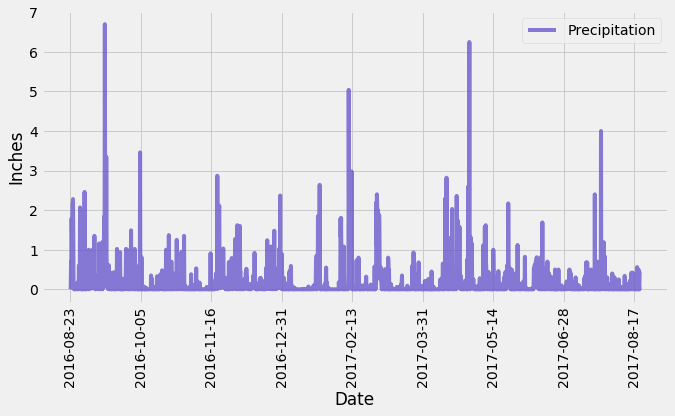

In [11]:
#Create precipitaton plot
prcp_date_df.plot(figsize=(10,5),color="slateblue",alpha=0.8)
plt.legend(loc="upper right")

#Plot title and labels
plt.ylabel("Inches")
plt.xlabel("Date")
plt.xticks(rotation="vertical")

plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp = prcp_date_df["Precipitation"]

mean_prcp = prcp_date_df["Precipitation"].mean()
print(f"The mean precipitation value is {mean_prcp}")

median_prcp = prcp_date_df["Precipitation"].median()
print(f"The median precipitation value is {median_prcp}")

mode_prcp = prcp_date_df["Precipitation"].mode()
print(f"The mode precipitation value is {mode_prcp}")

The mean precipitation value is 0.17727857496288899
The median precipitation value is 0.02
The mode precipitation value is 0    0.0
dtype: float64


In [13]:
# Design a query to show how many stations are available in this dataset
station_count = session.query(Measurement.station).group_by(Measurement.station).all()

station_count

[('USC00511918'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00516128'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519281'),
 ('USC00519397'),
 ('USC00519523')]

In [14]:
# What are the most active stations? (i.e. what stations have the most rows) 
#List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.id)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


#Lowest temperature recorded
min_temp = session.query(func.min(Measurement.tobs)).\
            filter(Measurement.station == Station.station).\
            filter(Measurement.station == "USC00519281").scalar()

print(f"The lowest temperature recorded in station USC00519281 is {min_temp}.")

#Highest temperature recorded
max_temp = session.query(func.max(Measurement.tobs)).\
            filter(Measurement.station == Station.station).\
            filter(Measurement.station == "USC00519281").scalar()

print(f"The highest temperature recorded in station USC00519281 is {max_temp}.")

#Average temperature recorded
avg_temp = session.query(func.avg(Measurement.tobs)).\
            filter(Measurement.station == Station.station).\
            filter(Measurement.station == "USC00519281").scalar()

print(f"The average temperature recorded in station USC00519281 is {avg_temp}.")

The lowest temperature recorded in station USC00519281 is 54.0.
The highest temperature recorded in station USC00519281 is 85.0.
The average temperature recorded in station USC00519281 is 71.66378066378067.


In [16]:
#Query the last 12 months of temperature observation data
tobs_date = session.query(Measurement.station,Measurement.date,Measurement.tobs)\
        .filter(Measurement.date >= date1)\
        .filter(Measurement.date <= date2).all()

In [17]:
#Choose the station with the highest number of temperature observations.
tobs_date_df = pd.DataFrame(tobs_date)
group_tobs = tobs_date_df.groupby("station")
tobs_count = group_tobs["tobs"].count()
tobs = pd.DataFrame(tobs_count)

tobs.sort_values(by="tobs",ascending=False)

,tobs
station,
USC00519397,361
USC00519281,352
USC00516128,349
USC00513117,343
USC00519523,337
USC00514830,305
USC00517948,183


In [18]:
#Filter by the station with the highest number of observations
station_index = tobs_date_df.set_index("station")
top_tobs_filter = station_index.loc["USC00519397",:]

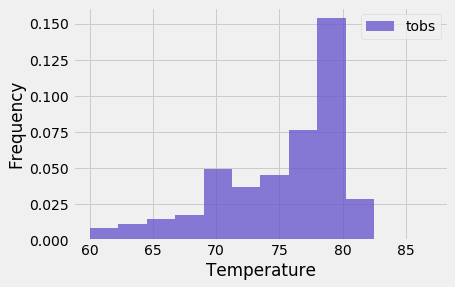

In [24]:
#Plot the results of the temperature observations. 
tobs=top_tobs_filter["tobs"]

#Create temperature histogram
plt.hist(tobs, 12, density=True, alpha=0.8, color="slateblue", label="tobs")

#Histogram legend
plt.legend(loc="best")

#Histogram title and labels
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.show()

In [25]:
station

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
